It is important that the credit company are able to recognize fraudulent credit card transaction so that customers are no charge for the item they did not purchase

## About Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

### Getting Started
Importing some important libraries

In [122]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis 

Reading and Understanding Data

In [123]:
#read data into dataframes
df = pd.read_csv('creditcard.csv')

In [124]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [125]:
print("Total no. of records  in data {} and Total no. of features {}".format(df.shape[0],df.shape[1]))

Total no. of records  in data 284807 and Total no. of features 31


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [127]:
# to check if there"s any null value in the dataset
df.isnull().sum().any()

False

Determine the numbers of legitimate and fraudulent transaction in the dataset.

In [128]:
legitimate = df[df["Class"]==0]
fraud = df[df["Class"]==1]

print(legitimate.shape, fraud.shape)

(284315, 31) (492, 31)


Text(0.5, 1.0, 'Class Distribution \n 0: Legitimate & 1: Fraud ')

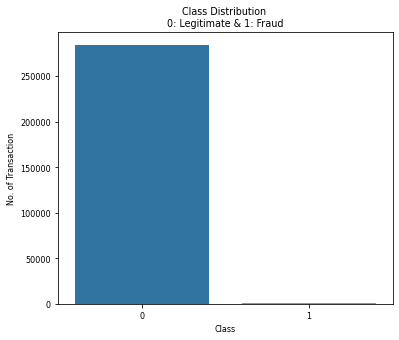

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.countplot(df['Class'])
plt.xlabel("Class")
plt.ylabel("No. of Transaction")
plt.title("Class Distribution \n 0: Legitimate & 1: Fraud ")

Looking at the Statistics of Amount Class in legitimate and fraud transaction.
How diffrent are the amount of money used in diffrent transaction classes ?

In [130]:
legitimate.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [131]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The data set is higly unbalance as you can see in the above figure, majority of the transaction data set contains are legitimate and only small fraction is fradulent. Our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud !

Text(0.5, 0, 'Time (sec)')

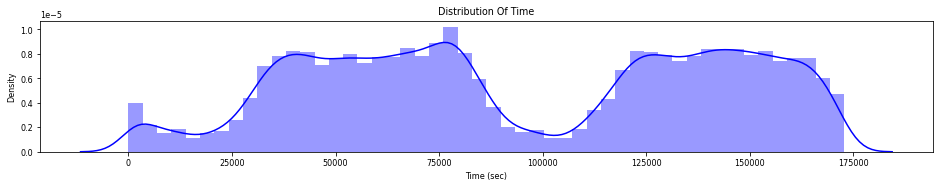

In [132]:
# TIME FEATURE INSIGHTS

plt.figure(figsize=(16,14))

plt.subplot(5,1,3)

plt.title("Distribution Of Time")
sns.distplot(df["Time"], color = "blue")
plt.xlabel("Time (sec)")

Text(0.5, 0, 'Amount ($)')

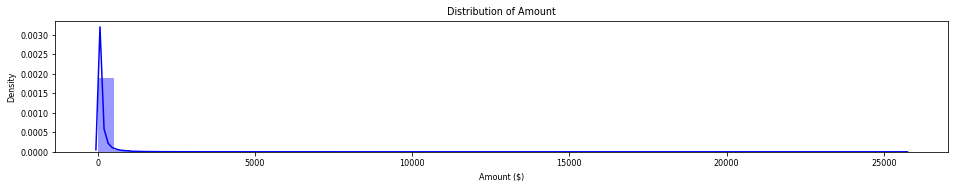

In [133]:
#AMOUNT FEATURE INSIGHTS

plt.figure(figsize=(16,14))

plt.subplot(5,1,3)

plt.title("Distribution of Amount")
sns.distplot(df["Amount"], color = "blue")
plt.xlabel("Amount ($)")

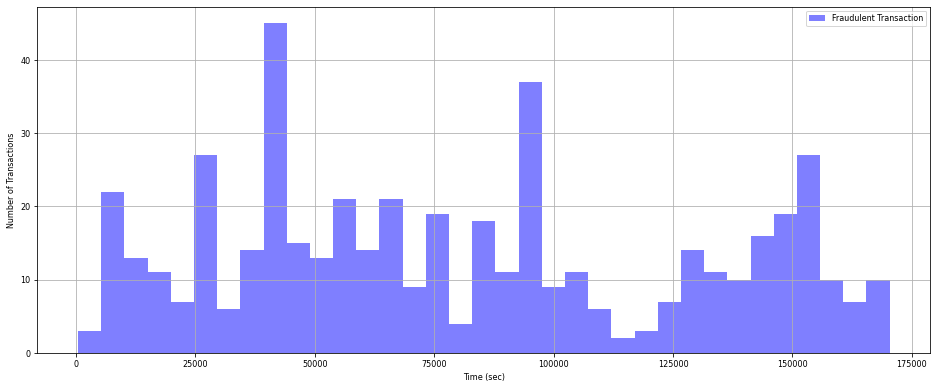

In [134]:
plt.figure(figsize=(16,14))

plt.subplot(2,1,1)
df[df.Class==1].Time.hist(bins=35, color="blue", alpha=0.5, label="Fraudulent Transaction")
plt.xlabel("Time (sec)")
plt.ylabel('Number of Transactions')
plt.legend()

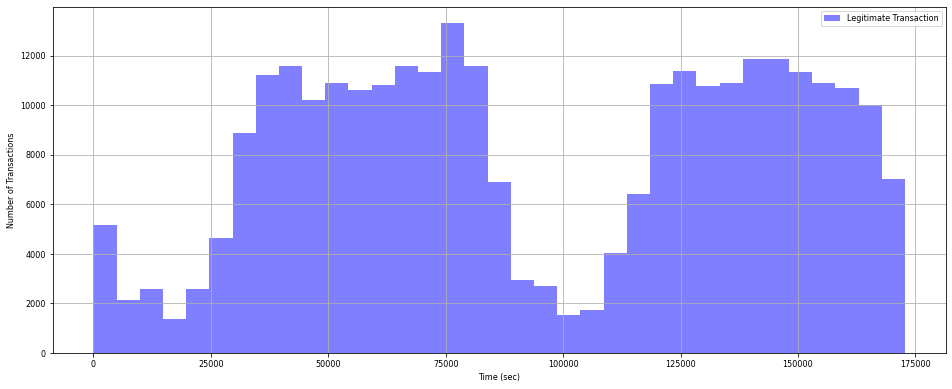

In [135]:
plt.figure(figsize=(16,14))

plt.subplot(2,1,1)
df[df.Class==0].Time.hist(bins=35, color="blue", alpha=0.5, label="Legitimate Transaction")
plt.xlabel("Time (sec)")
plt.ylabel('Number of Transactions')
plt.legend()

As we can see both classes are distributed over time. Thus no major insight drawn.

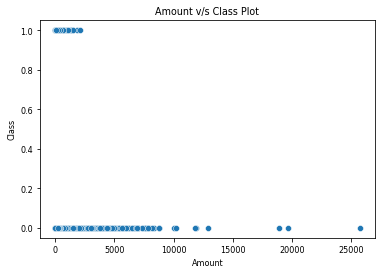

In [136]:
#Create a scatter plot 
sns.scatterplot(df["Amount"],df["Class"])
plt.title("Amount v/s Class Plot")
plt.show()

Low amount transaction are very few. Lower amounts are more likely to be fradulent transactions.

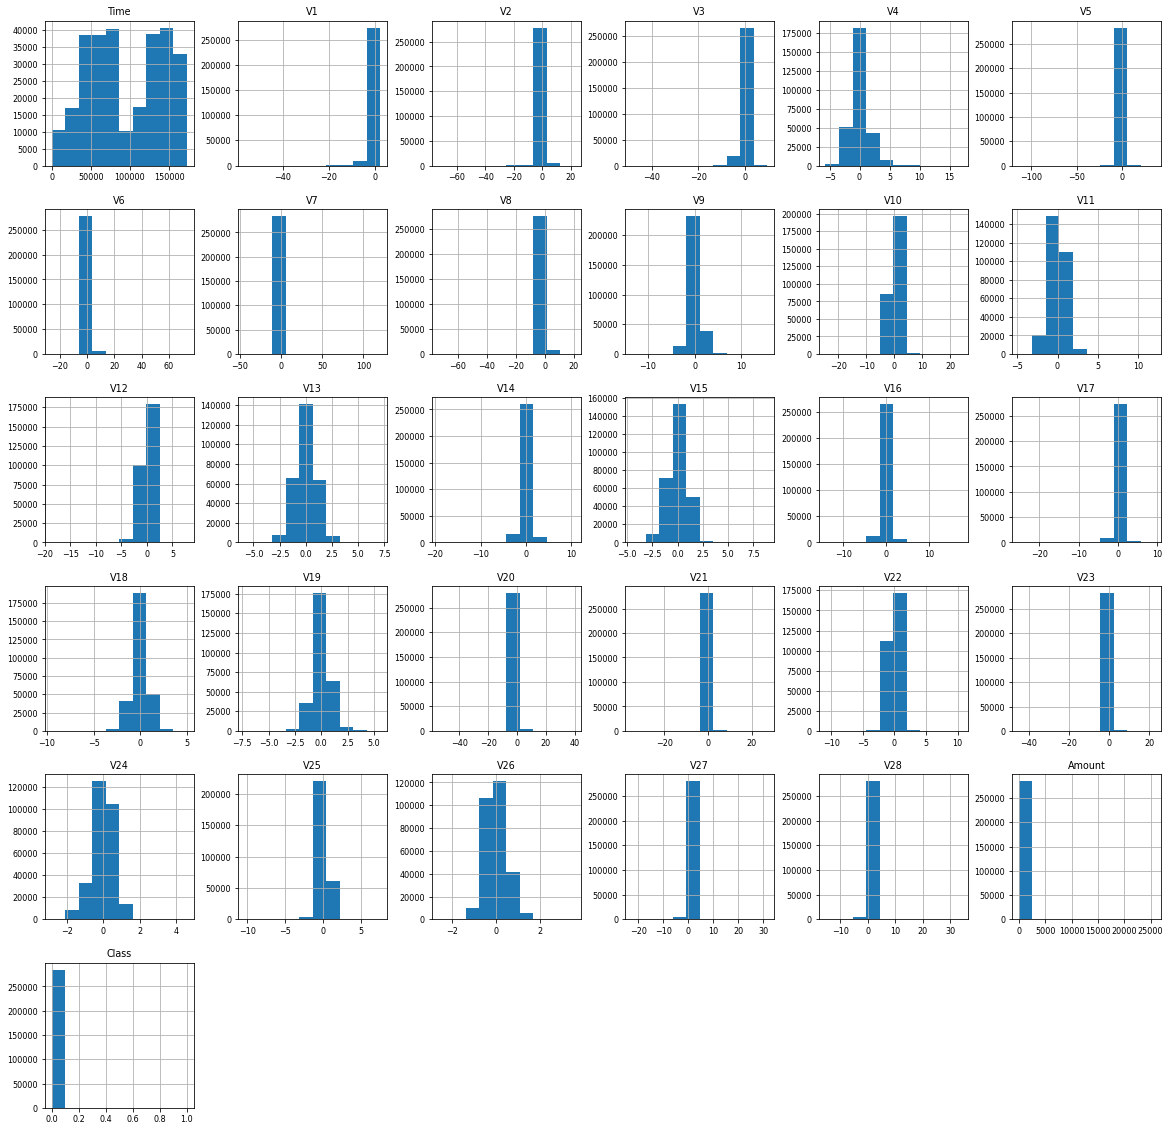

In [137]:
#Plot Histogram of each paramete
df.hist(figsize=(20,20))
plt.show()

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

Doesn't seem like the time of transaction really matters here as per above observation. Now let us take a sample of the dataset for out modelling and prediction

### Correlation

HeatMap - A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to communicate a value to the reader. This is a great tool to assist the audience towards the areas that matter the most when you have a large volume of data.
- It shows the relationship between two columns or variables
- if correlation is equal to zero i.e No Correlated
- if correlation is equal to one i.e Perfect Correlated
- if correlation is between less than zero to less than 0.45 i.e small positive correlated
- if correlation is between greater than 0.5 to 0.9 then it is i.e large positive correlated
- if correlation is negative to -0.45 is small neagtive correlated
- if correlation is negative between greater than - 0.5 to - 0.9 then it is i.e large negative correlated

<AxesSubplot:>

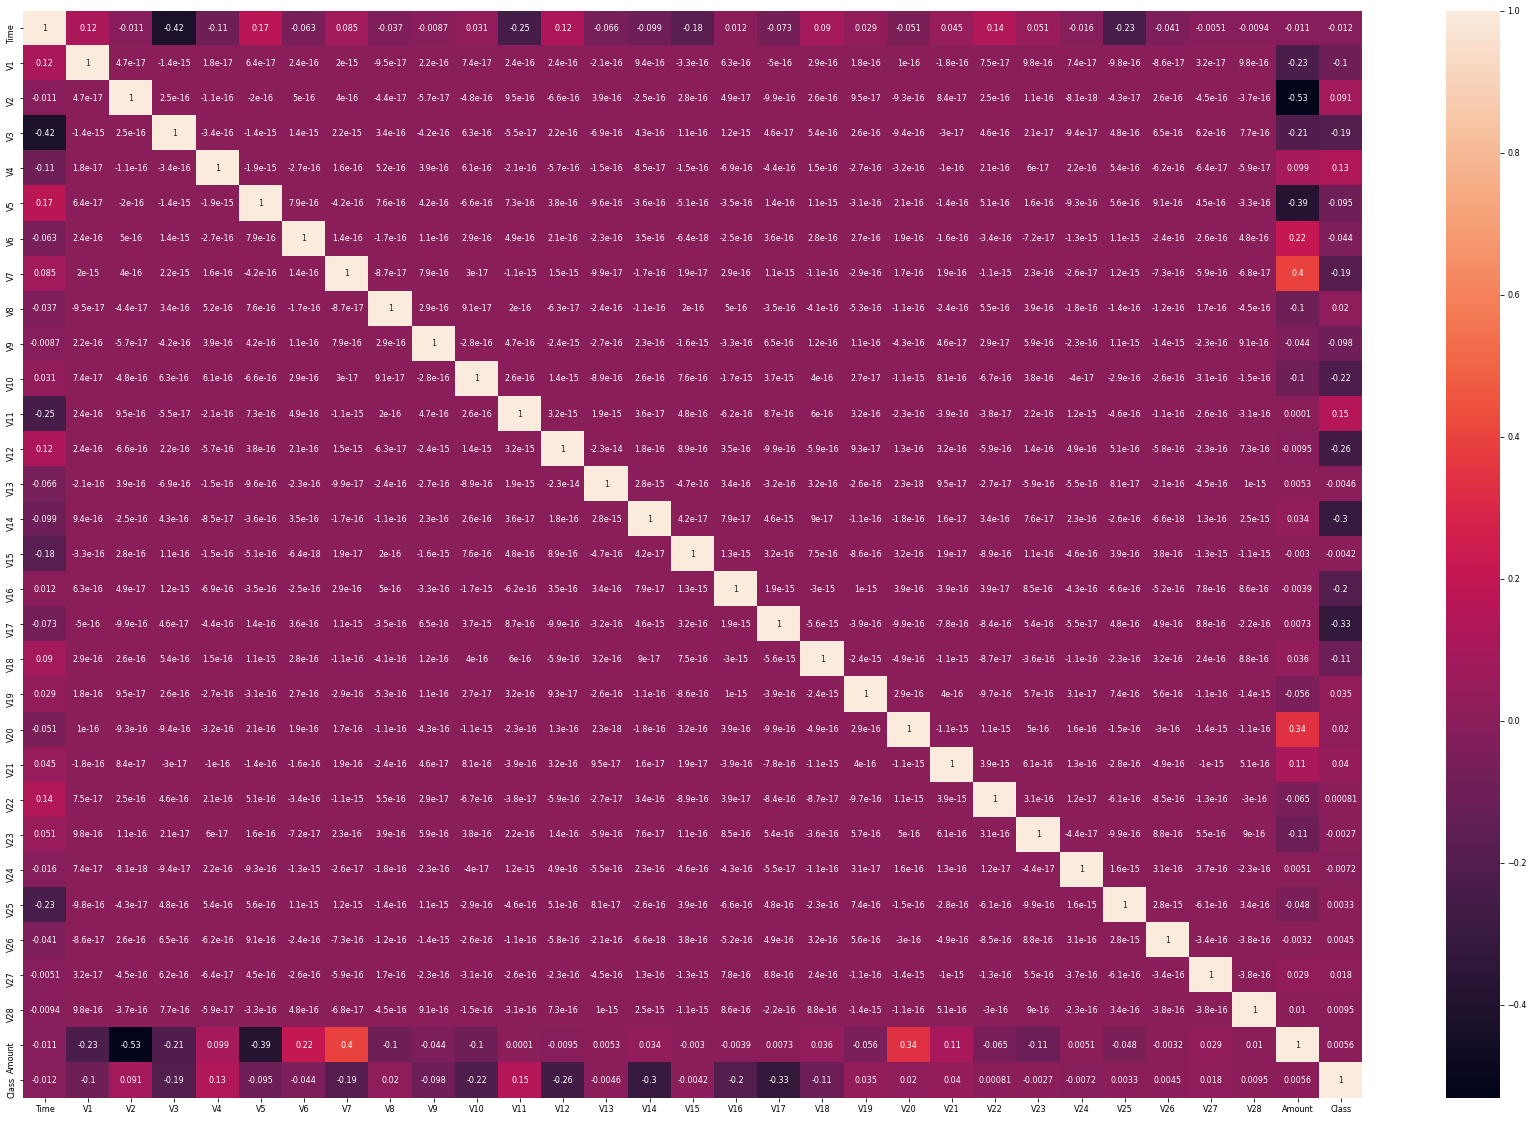

In [138]:
#Heatmap for the Correlation
plt.figure(figsize=(30,20))
corr=df.corr()
sns.heatmap(corr, annot= True)

### NOTE :

- V1, V3, V5, V8, V9, V10,V11, V12, V13, V14, V15, V16, V19, V22,V23, V25, V26 are small neagtive correlated with amount
- V2 is large neative correlated with amount
- V11 does not correlated with amount i.e 0.0
- V4, V6, V7, V14, V17, V18, V20,V21, V27 V28 are Small positive correlated.

# Data Preprocessing 

In [139]:
x = df.drop(["Class"],axis=1)
y = df["Class"]

In [140]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [141]:
# Load the library for splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.3, random_state = 42)

In [142]:
print("x_train - ",x_train.shape)
print("y_train - ",y_train.shape)
print("x_test - ",x_test.shape)
print("y_test - ",y_test.shape)

x_train -  (85442, 30)
y_train -  (85442,)
x_test -  (199365, 30)
y_test -  (199365,)


# Model Building For Imbalanced Dataset

# Logistic Regression Classifier

In [143]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
#fitting model in training set
model_lr.fit(x_train, y_train)

LogisticRegression()

In [144]:
#Predict on test data
y_predict = model_lr.predict(x_test)

In [145]:
from sklearn.metrics import classification_report
print("Classification Report : \n" ,classification_report(y_test,y_predict))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199031
           1       0.88      0.62      0.73       334

    accuracy                           1.00    199365
   macro avg       0.94      0.81      0.86    199365
weighted avg       1.00      1.00      1.00    199365



Confusion Matrix : 
 [[199003     28]
 [   127    207]]


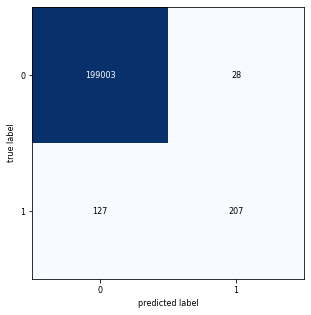

In [146]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_predict)
print("Confusion Matrix : \n", CM)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat= CM, figsize = (5,5))

In [147]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ("Accuracy Score:", accuracy_score(y_test, y_predict))
print ("F1 Score:", f1_score(y_test, y_predict))
print ("Precision:", precision_score(y_test, y_predict))
print ("Recall:", recall_score(y_test, y_predict))

Accuracy Score: 0.999222531537632
F1 Score: 0.7275922671353252
Precision: 0.8808510638297873
Recall: 0.6197604790419161


##### Our Model Predicted 235 transaction as fraudulent transaction and 199130 transaction as genuine transaction

In [148]:
# Predicted values counts for fraud and genuine of test dataset
pd.Series(y_predict).value_counts()

0    199130
1       235
dtype: int64

In [149]:
# Actual values counts for fraud and genuine of test dataset
pd.Series(y_test).value_counts()

0    199031
1       334
Name: Class, dtype: int64

###### There are originally 334 fraud transactions and our model predicted only 235 fraud transaction. So the accuracy of our model should be  235/334 , right?

In [150]:
235/334

0.7035928143712575

So 70.35% should be our accuracy.

### However, this not the case. Actually there are originally 334 fraud transactions and 199130 genuine transactions in the test dataset. However, our model predicted only 235 fraud transaction. Also, it should be kept in mind that these 235 predicted fraud transaction may not be identified correctly. It means that these predicted 235 fraud transactions are NOT only from 334 originally fraud transaction, but they may also be from genuine transactions as well.

###### We will see our real accuracy in below cells.

# Model Evolution Matrix

Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.

In reference of our case:

Recall (True Positive Rate): % of all fraudulent transactions cases captured.

Precision: Out of all items labeled as fraud, what percentage of them is actually fraud?

Accuracy: How correct the model is (misleading for fraud/imbalanced data)

F1 score: combination of recall and precision into one metric. F1 score is the weighted average of precision and recall, taking BOTH false positives and false negatives into account. Usually much more useful than accuracy, especially with uneven classes.

#### There are 207 transaction recognised as True Postive, means they are orignally fraud transactions and our model precited them as fraud.

#### True Negative - 199003 (truely saying negative - genuine transaction correctly identified as genuine)

#### True Postive - 207 (truely saying positive - fraud transaction correctly identified as fraud)

#### False Negative - 127   ( falsely saying negative - fraud transaction incorrectly identified as genuine)

#### False Positive - 28 ( falsely saying positive - genuine transaction incorrectly identified as fraud)

#### We already know that we have 334 fraud transaction in our test dataset, but our model predicted only 207 fraud transaction. So the real accuracy of our model is  207/334

In [151]:
207/334

0.6197604790419161

### So, 61.11% is the real accuracy of our model, which is nothing but the Recall Score. So we have the emphasis on Recall score and F1 score to measure the performance of our model, not the accuracy.

# Receiver Operating Characteristics (ROC)

The ROC is a performance measurement for classification problems at various thresholds. It is essentially a probability curve, and the higher the Area Under the Curve (AUC) score the better the model is at predicting fraudulent/non-fraudulent transactions.

It is an evaluation metric that helps identify the strength of the model to distinguish between two outcomes. It defines if a model can create a clear boundary between the postive and the negative class.

- Sensitivity or Recall

The sensitivity of a model is defined by the proportion of actual positives that are classified as Positives , i.e = TP / ( TP + FN )

- Specificity

The specificity of a model is defined by the proportion of actual negatives that are classified as Negatives , i.e = TN / ( TN + FP )


##  ROC CURVE
It is a plot between Sesitivity and ( 1 - Specificity ) , which intuitively is a plot between True Positive Rate and False Positive Rate. It depicts if a model can clearly identify each class or not

Higher the area under the curve , better the model and it's ability to seperate the positive and negative class.

In [152]:
#Step1: Extract the prob of true value for your labels
y_pred_proba = model_lr.predict_proba(x_test)
y_pred_proba

array([[1.81859351e-08, 9.99999982e-01],
       [9.99831810e-01, 1.68189684e-04],
       [9.99900169e-01, 9.98309531e-05],
       ...,
       [9.99873041e-01, 1.26959134e-04],
       [9.99764553e-01, 2.35446688e-04],
       [9.99549074e-01, 4.50925673e-04]])

In [153]:
auc = roc_auc_score(y_test, y_pred_proba[:,1])
print("AUC - ROC ",auc,"\n")

AUC - ROC  0.9720360265245594 



ROC-AUC -  0.9720360265245594


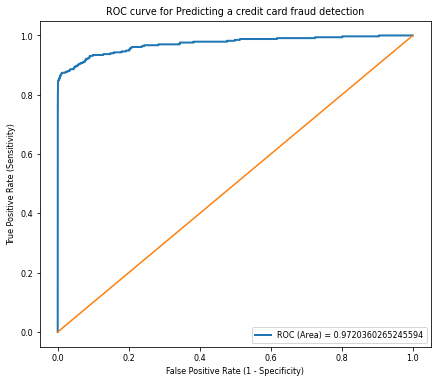

In [154]:
from sklearn.metrics import roc_curve
# plot ROC Curve

plt.figure(figsize=(7,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1]) #Extract the prob of true value for your label (1)


auc = roc_auc_score(y_test, y_pred_proba[:,1])
print("ROC-AUC - ",auc)

plt.plot(fpr,tpr,linewidth=2, label="ROC (Area) = "+ str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1])

plt.rcParams['font.size'] = 8
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Random Forest Classifier

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
rfc = RandomForestClassifier()

In [157]:
rfc.fit(x_train, y_train)

y_pred2 = rfc.predict(x_test) #Predict on test data

In [158]:
print("Classification Report :\n",classification_report(y_test,y_pred2))

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199031
           1       0.93      0.73      0.82       334

    accuracy                           1.00    199365
   macro avg       0.97      0.86      0.91    199365
weighted avg       1.00      1.00      1.00    199365



In [159]:
print("Accuracy",accuracy_score(y_test,y_pred2))
print("Recall",recall_score(y_test,y_pred2))
print("Precision",precision_score(y_test,y_pred2))
print("F1 Score",f1_score(y_test,y_pred2))

Accuracy 0.9994532641135605
Recall 0.7275449101796407
Precision 0.9310344827586207
F1 Score 0.8168067226890756


ConfusionMatrix: 
 [[199013     18]
 [    91    243]]


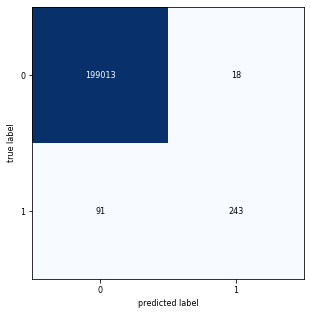

In [160]:
CM2 = confusion_matrix(y_test, y_pred2)
print("ConfusionMatrix: \n", CM2)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM2, figsize=(5,5))

In [161]:
#Step1: Extract the prob of true value for your labels
y_pred_proba2 = rfc.predict_proba(x_test)
y_pred_proba2

array([[0.22, 0.78],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [162]:
auc = roc_auc_score(y_test,y_pred_proba2[:,1])
print("ROC-AUC:",auc)

ROC-AUC: 0.9428311005143272


ROC-AUC -  0.9428311005143272


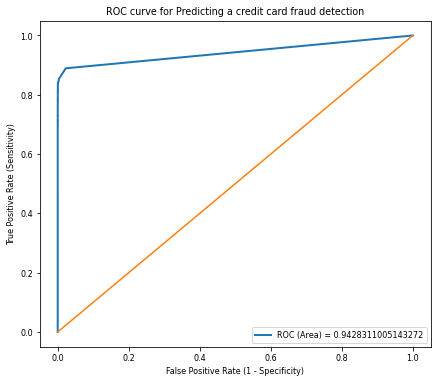

In [163]:
from sklearn.metrics import roc_curve
# plot ROC Curve

plt.figure(figsize=(7,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba2[:,1]) #Extract the prob of true value for your label (1)


auc = roc_auc_score(y_test, y_pred_proba2[:,1])
print("ROC-AUC - ",auc)

plt.plot(fpr,tpr,linewidth=2, label="ROC (Area) = "+ str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1])

plt.rcParams['font.size'] = 8
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

 # XG Boost Classifiers

In [164]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [165]:
xgb = XGBClassifier()

In [166]:
xgb.fit(x_train,y_train)

[00:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [167]:
y_pred3 = xgb.predict(x_test)

In [168]:
print("Classification Report :\n",classification_report(y_test,y_pred3))

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199031
           1       0.96      0.77      0.85       334

    accuracy                           1.00    199365
   macro avg       0.98      0.89      0.93    199365
weighted avg       1.00      1.00      1.00    199365



ConfusionMatrix: 
 [[199019     12]
 [    76    258]]


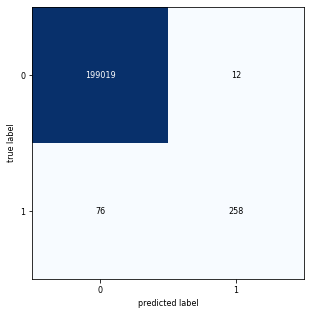

In [169]:
CM2 = confusion_matrix(y_test, y_pred3)
print("ConfusionMatrix: \n", CM2)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM2, figsize=(5,5))

In [170]:
print("Accuracy",accuracy_score(y_test,y_pred3))
print("Recall",recall_score(y_test,y_pred3))
print("Precision",precision_score(y_test,y_pred3))
print("F1 Score",f1_score(y_test,y_pred3))

Accuracy 0.9995585985503975
Recall 0.7724550898203593
Precision 0.9555555555555556
F1 Score 0.8543046357615895


In [171]:
y_pred_proba3 = xgb.predict_proba(x_test)
y_pred_proba3

array([[5.5283308e-04, 9.9944717e-01],
       [9.9999887e-01, 1.1045914e-06],
       [9.9997580e-01, 2.4215040e-05],
       ...,
       [9.9999911e-01, 9.0980365e-07],
       [9.9999434e-01, 5.6563854e-06],
       [9.9999946e-01, 5.3410457e-07]], dtype=float32)

In [172]:
auc = roc_auc_score(y_test,y_pred_proba3[:,1])
print("ROC-AUC:",auc)

ROC-AUC: 0.9719441291861464


ROC-AUC -  0.9719441291861464


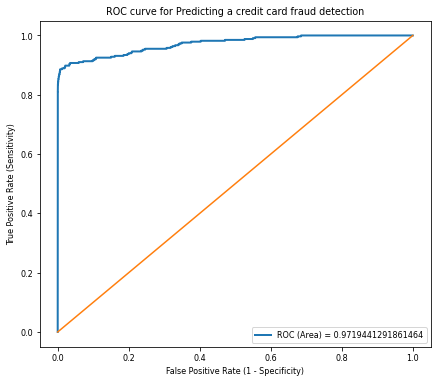

In [173]:
from sklearn.metrics import roc_curve
# plot ROC Curve

plt.figure(figsize=(7,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba3[:,1]) #Extract the prob of true value for your label (1)


auc = roc_auc_score(y_test, y_pred_proba3[:,1])
print("ROC-AUC - ",auc)

plt.plot(fpr,tpr,linewidth=2, label="ROC (Area) = "+ str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1])

plt.rcParams['font.size'] = 8
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## XGBoost model is giving good performance on the unbalanced data among these 3 models. ROC-AUC score on test data 97% which is same as of Logistic Regression but Recall - F1 Score is slightly higher than other Classifier.

# Solution for unbalanced dataset

#### Under Sampling 
Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set.

- Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.

#### Synthetic Minority OverSampling Technique (SMOTE)
In this technique, instead of simply duplicating data from the minority class, we synthesize new data from the minority class. This is a type of data augmentation for tabular data can be very effective. This approach to synthesizing new data is called the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [174]:
from collections import Counter # counter takes values returns value_counts dictionary
from imblearn.under_sampling import RandomUnderSampler

# Logistic Regression + Random UnderSampling

In [175]:
from sklearn.linear_model import LogisticRegression
rus = RandomUnderSampler(random_state=42)
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

print('Original dataset shape %s' % Counter(y_train))

print('Resampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({0: 85284, 1: 158})
Resampled dataset shape Counter({0: 158, 1: 158})


In [176]:
lr = LogisticRegression()
lr.fit(x_train_rus,y_train_rus)

LogisticRegression()

In [177]:
y_pred4 = lr.predict(x_test)

In [178]:
print("Classification Report :\n",classification_report(y_test,y_pred4))

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    199031
           1       0.03      0.90      0.06       334

    accuracy                           0.96    199365
   macro avg       0.52      0.93      0.52    199365
weighted avg       1.00      0.96      0.98    199365



ConfusionMatrix: 
 [[190279   8752]
 [    35    299]]


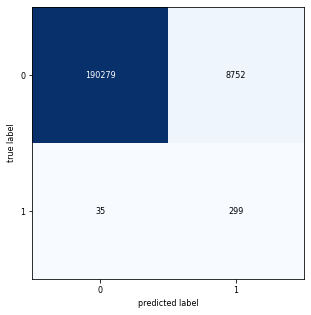

In [179]:
CM2 = confusion_matrix(y_test, y_pred4)
print("ConfusionMatrix: \n", CM2)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM2, figsize=(5,5))

In [180]:
print("Accuracy",accuracy_score(y_test,y_pred4))
print("Recall",recall_score(y_test,y_pred4))
print("Precision",precision_score(y_test,y_pred4))
print("F1 Score",f1_score(y_test,y_pred4))

Accuracy 0.9559250620720788
Recall 0.8952095808383234
Precision 0.033035023754281294
F1 Score 0.06371870005327651


In [181]:
y_pred_proba4 = lr.predict_proba(x_test)
y_pred_proba4

array([[1.06918918e-11, 1.00000000e+00],
       [4.05102076e-01, 5.94897924e-01],
       [9.30333413e-01, 6.96665865e-02],
       ...,
       [9.97998304e-01, 2.00169612e-03],
       [9.79710296e-01, 2.02897042e-02],
       [9.98247648e-01, 1.75235171e-03]])

In [182]:
auc = roc_auc_score(y_test,y_pred_proba4[:,1])
print("ROC-AUC:",auc)

ROC-AUC: 0.9667127502209283


ROC-AUC -  0.9667127502209283


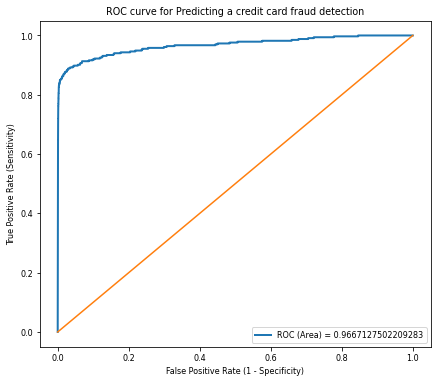

In [183]:
from sklearn.metrics import roc_curve
# plot ROC Curve

plt.figure(figsize=(7,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba4[:,1]) #Extract the prob of true value for your label (1)


auc = roc_auc_score(y_test, y_pred_proba4[:,1])
print("ROC-AUC - ",auc)

plt.plot(fpr,tpr,linewidth=2, label="ROC (Area) = "+ str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1])

plt.rcParams['font.size'] = 8
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Random Forest Classifier + Random UnderSampling

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
rfc = RandomForestClassifier()

In [186]:
rfc.fit(x_train_rus, y_train_rus)

y_pred5 = rfc.predict(x_test) #Predict on test data

In [187]:
print("Classification Report :\n",classification_report(y_test,y_pred5))

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    199031
           1       0.06      0.88      0.11       334

    accuracy                           0.98    199365
   macro avg       0.53      0.93      0.55    199365
weighted avg       1.00      0.98      0.99    199365



ConfusionMatrix: 
 [[194365   4666]
 [    39    295]]


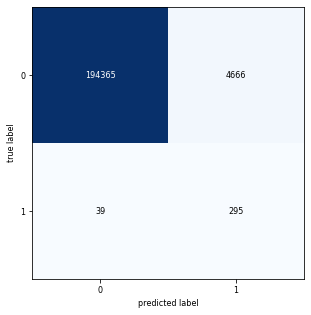

In [188]:
CM2 = confusion_matrix(y_test, y_pred5)
print("ConfusionMatrix: \n", CM2)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM2, figsize=(5,5))

In [189]:
print("Accuracy",accuracy_score(y_test,y_pred5))
print("Recall",recall_score(y_test,y_pred5))
print("Precision",precision_score(y_test,y_pred5))
print("F1 Score",f1_score(y_test,y_pred5))

Accuracy 0.9764000702229579
Recall 0.8832335329341318
Precision 0.059463817778673655
F1 Score 0.11142587346553354


In [190]:
y_pred_proba5 = rfc.predict_proba(x_test)
y_pred_proba5

array([[0.  , 1.  ],
       [0.91, 0.09],
       [0.74, 0.26],
       ...,
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.97, 0.03]])

In [191]:
auc = roc_auc_score(y_test,y_pred_proba5[:,1])
print("ROC-AUC:",auc)

ROC-AUC: 0.9750610495274756


ROC-AUC -  0.9750610495274756


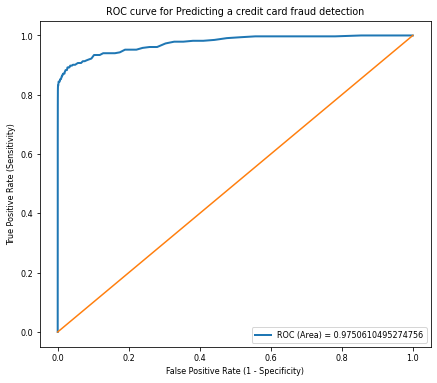

In [192]:
from sklearn.metrics import roc_curve
# plot ROC Curve

plt.figure(figsize=(7,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba5[:,1]) #Extract the prob of true value for your label (1)


auc = roc_auc_score(y_test, y_pred_proba5[:,1])
print("ROC-AUC - ",auc)

plt.plot(fpr,tpr,linewidth=2, label="ROC (Area) = "+ str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1])

plt.rcParams['font.size'] = 8
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# XG Boost + Random Under Sampling

In [193]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [194]:
xgb = XGBClassifier()

In [195]:
xgb.fit(x_train_rus,y_train_rus)

[00:02:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [196]:
y_pred6 = xgb.predict(x_test)

In [197]:
print("Classification Report :\n",classification_report(y_test,y_pred6))

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    199031
           1       0.03      0.89      0.07       334

    accuracy                           0.96    199365
   macro avg       0.52      0.92      0.52    199365
weighted avg       1.00      0.96      0.98    199365



ConfusionMatrix: 
 [[190669   8362]
 [    37    297]]


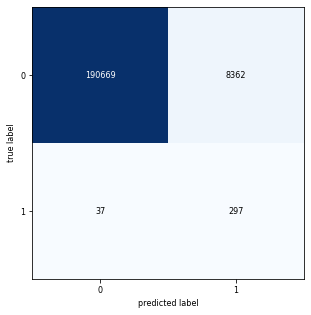

In [198]:
CM2 = confusion_matrix(y_test, y_pred6)
print("ConfusionMatrix: \n", CM2)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM2, figsize=(5,5))

In [199]:
print("Accuracy",accuracy_score(y_test,y_pred6))
print("Recall",recall_score(y_test,y_pred6))
print("Precision",precision_score(y_test,y_pred6))
print("F1 Score",f1_score(y_test,y_pred6))

Accuracy 0.9578712411907807
Recall 0.8892215568862275
Precision 0.03429957269892597
F1 Score 0.06605137329033692


In [200]:
y_pred_proba6 = xgb.predict_proba(x_test)
y_pred_proba6

array([[1.0086894e-03, 9.9899131e-01],
       [9.8167676e-01, 1.8323226e-02],
       [9.7148687e-01, 2.8513109e-02],
       ...,
       [9.9921662e-01, 7.8340480e-04],
       [9.9791712e-01, 2.0828876e-03],
       [9.7090602e-01, 2.9094001e-02]], dtype=float32)

In [201]:
auc = roc_auc_score(y_test,y_pred_proba6[:,1])
print("ROC-AUC:",auc)

ROC-AUC: 0.9706140773003284


ROC-AUC -  0.9706140773003284


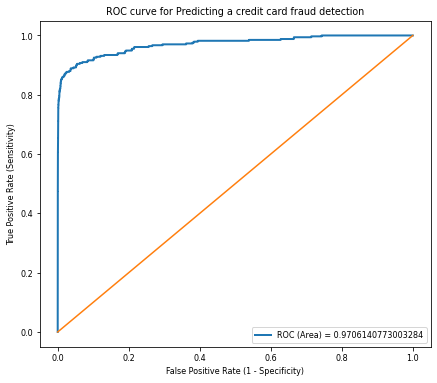

In [202]:
from sklearn.metrics import roc_curve
# plot ROC Curve

plt.figure(figsize=(7,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba6[:,1]) #Extract the prob of true value for your label (1)


auc = roc_auc_score(y_test, y_pred_proba6[:,1])
print("ROC-AUC - ",auc)

plt.plot(fpr,tpr,linewidth=2, label="ROC (Area) = "+ str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1])

plt.rcParams['font.size'] = 8
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## Compared to the original imbalanced Random Forest Classifier, the Recall and F1 Score improved by using UnderSampling at the cost of Precision. Furthermore, there is a slight increased in the Average ROC_AUC score. Hence Random Forest Work better when used with UnderSampling.

# Synthetic Minority Over-sampling Technique

- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
- This algorithm helps to overcome the overfitting problem posed by random oversampling.
- It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.
- general idea to carry out this technique is to bring the minority class values ( either 0 or 1 ) to a comparable number in terms of the other class . In other words to match up the length of the other class.

In [203]:
from imblearn.over_sampling import SMOTE

In [204]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)

In [205]:
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 85284, 1: 158})
Resampled dataset shape Counter({0: 85284, 1: 85284})


# Logistic Regression + SMOTE

In [206]:
lr = LogisticRegression()
lr.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [207]:
y_pred7 = lr.predict(x_test)

In [208]:
print("Classification Report :\n",classification_report(y_test,y_pred7))

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    199031
           1       0.07      0.88      0.12       334

    accuracy                           0.98    199365
   macro avg       0.53      0.93      0.56    199365
weighted avg       1.00      0.98      0.99    199365



ConfusionMatrix: 
 [[194925   4106]
 [    39    295]]


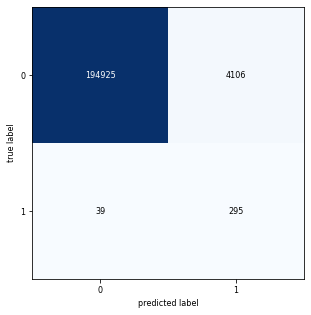

In [209]:
CM2 = confusion_matrix(y_test, y_pred7)
print("ConfusionMatrix: \n", CM2)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM2, figsize=(5,5))

In [210]:
print("Accuracy",accuracy_score(y_test,y_pred7))
print("Recall",recall_score(y_test,y_pred7))
print("Precision",precision_score(y_test,y_pred7))
print("F1 Score",f1_score(y_test,y_pred7))

Accuracy 0.97920898853861
Recall 0.8832335329341318
Precision 0.06703022040445353
F1 Score 0.1246040126715945


In [211]:
y_pred_proba7 = lr.predict_proba(x_test)
y_pred_proba7

array([[0.00000000e+00, 1.00000000e+00],
       [8.38589217e-01, 1.61410783e-01],
       [8.42407238e-01, 1.57592762e-01],
       ...,
       [9.97124733e-01, 2.87526731e-03],
       [9.83574875e-01, 1.64251250e-02],
       [9.99817698e-01, 1.82302289e-04]])

In [212]:
auc = roc_auc_score(y_test,y_pred_proba7[:,1])
print("ROC-AUC:",auc)

ROC-AUC: 0.9729844088621347


ROC-AUC -  0.9729844088621347


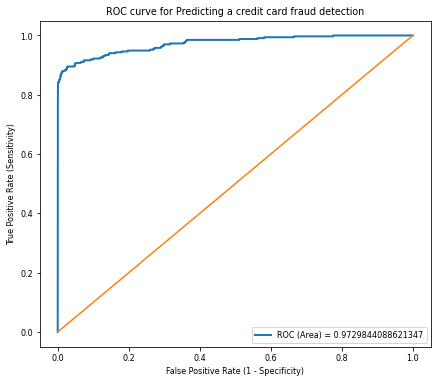

In [213]:
from sklearn.metrics import roc_curve
# plot ROC Curve

plt.figure(figsize=(7,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba7[:,1]) #Extract the prob of true value for your label (1)


auc = roc_auc_score(y_test, y_pred_proba7[:,1])
print("ROC-AUC - ",auc)

plt.plot(fpr,tpr,linewidth=2, label="ROC (Area) = "+ str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1])

plt.rcParams['font.size'] = 8
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Random Forest Classifier + SMOTE


In [214]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train_smote, y_train_smote)

y_pred8 = rfc.predict(x_test) #Predict on test data

In [215]:
print("Classification Report :\n",classification_report(y_test,y_pred8))

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199031
           1       0.83      0.75      0.79       334

    accuracy                           1.00    199365
   macro avg       0.91      0.88      0.89    199365
weighted avg       1.00      1.00      1.00    199365



ConfusionMatrix: 
 [[198979     52]
 [    83    251]]


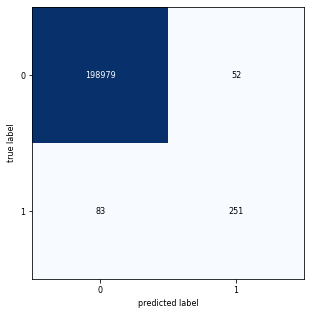

In [216]:
CM2 = confusion_matrix(y_test, y_pred8)
print("ConfusionMatrix: \n", CM2)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM2, figsize=(5,5))

In [217]:
print("Accuracy",accuracy_score(y_test,y_pred8))
print("Recall",recall_score(y_test,y_pred8))
print("Precision",precision_score(y_test,y_pred8))
print("F1 Score",f1_score(y_test,y_pred8))

Accuracy 0.9993228500489053
Recall 0.7514970059880239
Precision 0.8283828382838284
F1 Score 0.7880690737833594


In [218]:
y_pred_proba8 = rfc.predict_proba(x_test)
y_pred_proba8

array([[0.1 , 0.9 ],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [219]:
auc = roc_auc_score(y_test,y_pred_proba8[:,1])
print("ROC-AUC:",auc)

ROC-AUC: 0.9627008048606276


ROC-AUC -  0.9627008048606276


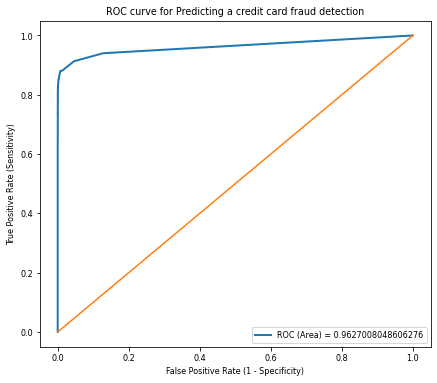

In [220]:
from sklearn.metrics import roc_curve
# plot ROC Curve

plt.figure(figsize=(7,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba8[:,1]) #Extract the prob of true value for your label (1)


auc = roc_auc_score(y_test, y_pred_proba8[:,1])
print("ROC-AUC - ",auc)

plt.plot(fpr,tpr,linewidth=2, label="ROC (Area) = "+ str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1])

plt.rcParams['font.size'] = 8
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# XGBoost + SMOTE

In [221]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [222]:
xgb = XGBClassifier()

In [223]:
xgb.fit(x_train_smote,y_train_smote)

[00:04:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [224]:
y_pred9 = xgb.predict(x_test)

In [225]:
print("Classification Report :\n",classification_report(y_test,y_pred9))

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199031
           1       0.75      0.80      0.78       334

    accuracy                           1.00    199365
   macro avg       0.88      0.90      0.89    199365
weighted avg       1.00      1.00      1.00    199365



ConfusionMatrix: 
 [[198942     89]
 [    66    268]]


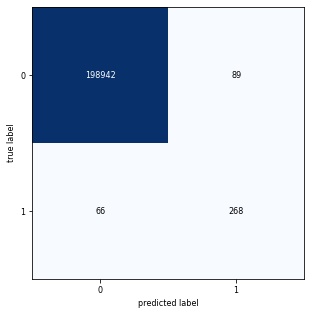

In [226]:
CM2 = confusion_matrix(y_test, y_pred9)
print("ConfusionMatrix: \n", CM2)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM2, figsize=(5,5))

In [227]:
print("Accuracy",accuracy_score(y_test,y_pred9))
print("Recall",recall_score(y_test,y_pred9))
print("Precision",precision_score(y_test,y_pred9))
print("F1 Score",f1_score(y_test,y_pred9))

Accuracy 0.999222531537632
Recall 0.8023952095808383
Precision 0.7507002801120448
F1 Score 0.7756874095513748


In [228]:
y_pred_proba9 = xgb.predict_proba(x_test)
y_pred_proba9

array([[9.5367432e-07, 9.9999905e-01],
       [9.9999988e-01, 1.2449784e-07],
       [9.9997056e-01, 2.9456663e-05],
       ...,
       [1.0000000e+00, 2.3573453e-08],
       [9.9999690e-01, 3.1203158e-06],
       [9.9998957e-01, 1.0429912e-05]], dtype=float32)

In [229]:
auc = roc_auc_score(y_test,y_pred_proba9[:,1])
print("ROC-AUC:",auc)

ROC-AUC: 0.9736367009538459


ROC-AUC -  0.9736367009538459


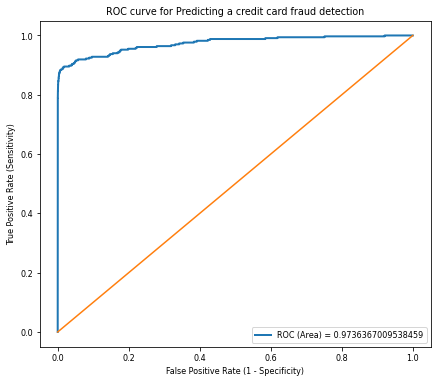

In [230]:
from sklearn.metrics import roc_curve
# plot ROC Curve

plt.figure(figsize=(7,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba9[:,1]) #Extract the prob of true value for your label (1)


auc = roc_auc_score(y_test, y_pred_proba9[:,1])
print("ROC-AUC - ",auc)

plt.plot(fpr,tpr,linewidth=2, label="ROC (Area) = "+ str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1])

plt.rcParams['font.size'] = 8
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## The Average ROC_AUC score of XGBoost Classifier is same as the Logistic Regression Classifier after balancing data using SMOTE. However, the Recall is too higher for the Logistic Regression compared to the XG Boost Classifier and Random Forest Classifier.

# Hightlights

# Here, we have to focus on a high recall in order to detect actual fraudulent transactions in order to save the banks from high-value fraudulent transactions.In our scenario Accuracy was not a concerning Evaluation criteria and we focussed more on Recall and AUC. We finally able to build a proper logistic model and predicted on test data and the results were satisfying.

# Hence, for building a proper model on top of that we have used some balancing techniques like (RUS,SMOTE etc) to balance the data and applied some of very popular logistic regression models like Random Forest, Logistic regression and some boosting techniques like XGBoost to catch any frud transactions.